# Importera relavanta bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import cv2
import joblib

# Hämta dataset Mnist 

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='auto')
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Dela upp data samt skapa tränings, test och validerings set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [5]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# Kör en EDA för att bekanta dig med innehållet i MNIST

In [6]:
print(X_train_val.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train_val.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


In [7]:
print (pd.DataFrame(X_train_val).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 299.1 MB
None


In [8]:
print (X_train_val[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11 213 193  30
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  92 252 233  30   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  31  31   0   0 173 253
 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 123 233 151   0   0 253 252 102   0   

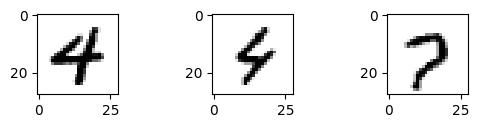

In [9]:
plt.subplot(431)
plt.imshow((X_train_val[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(432)
plt.imshow((X_train_val[1].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(433)
plt.imshow((X_train_val[2].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

In [10]:
print("First number: ", y_train_val[0])
print("Second number: ", y_train_val[1]) 
print("Third number: ", y_train_val[2])

First number:  4
Second number:  4
Third number:  7


# Välja modeller för att träna datan på

### 1 LOGISTIC REGRESSION

In [11]:
class_lr = LogisticRegression()
class_lr.fit(X_train_val, y_train_val)

y_val_pred_lr = class_lr.predict(X_val)
print("Accuracy of model =", accuracy_score(y_val, y_val_pred_lr))

Accuracy of model = 0.9186


C:\Users\frida\anaconda3\envs\Streamlit\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


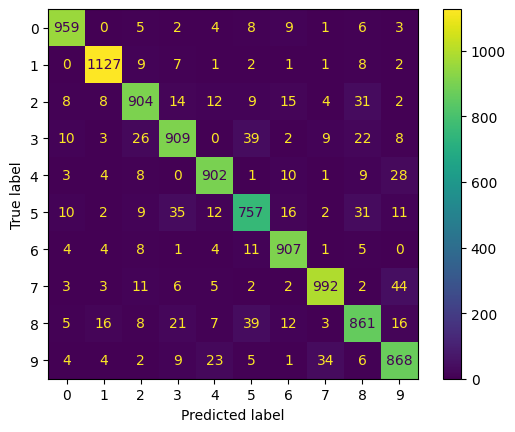

In [12]:
confmatrix = confusion_matrix(y_val, y_val_pred_lr, labels=class_lr.classes_)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=class_lr.classes_)
display_matrix.plot()

In [13]:
print(classification_report(y_val, y_val_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       997
           1       0.96      0.97      0.97      1158
           2       0.91      0.90      0.91      1007
           3       0.91      0.88      0.89      1028
           4       0.93      0.93      0.93       966
           5       0.87      0.86      0.86       885
           6       0.93      0.96      0.94       945
           7       0.95      0.93      0.94      1070
           8       0.88      0.87      0.87       988
           9       0.88      0.91      0.90       956

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
# Trying Logistic Regression again but with a higher number of Max-interations
class_lr = LogisticRegression(max_iter=10000)
class_lr.fit(X_train_val, y_train_val)

y_val_pred_iter = class_lr.predict(X_val)
print("Accuracy of model =", accuracy_score(y_val, y_val_pred_iter))

In [ ]:
# Trying Logistic Regression again but with a higher number of Max-interations and preprocessed data
class_lr = LogisticRegression(max_iter=10000)

scaler = StandardScaler()
X_train_val_scale = scaler.fit_transform(X_train_val)
X_val_scale = scaler.transform(X_val)

class_lr.fit(X_train_val_scale, y_train_val)

y_val_pred_scale = class_lr.predict(X_val_scale)
print("Accuracy of model =", accuracy_score(y_val, y_val_pred_scale))

### 2 SUPPORT VECTOR MACHINE

In [ ]:
class_svc = svm.SVC()
class_svc.fit(X_train_val, y_train_val)

y_val_pred_svc = class_svc.predict(X_val)
print("Accuracy of model =", accuracy_score(y_val, y_val_pred_svc))

In [ ]:
print(classification_report(y_val, y_val_pred_svc))

In [ ]:
confmatrix = confusion_matrix(y_val, y_val_pred_svc, labels=class_svc.classes_)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=class_svc.classes_)
display_matrix.plot()

### 3 KN NEIGHBORS

In [ ]:
class_KNN = KNeighborsClassifier()
class_KNN.fit(X_train_val, y_train_val)

y_val_pred_KNN = class_KNN.predict(X_val)
print("Accuracy of model =", accuracy_score(y_val, y_val_pred_KNN))

In [ ]:
print(classification_report(y_val, y_val_pred_KNN))

In [ ]:
confmatrix = confusion_matrix(y_val, y_val_pred_KNN, labels=class_KNN.classes_)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=class_KNN.classes_)
display_matrix.plot()

### Jämförelse av modeller

In [ ]:
print("De modeller som är testade hade följande precision:")
print("LR:", accuracy_score(y_val, y_val_pred_lr))
print("SVC:", accuracy_score(y_val, y_val_pred_svc))
print("KNN:",accuracy_score(y_val, y_val_pred_KNN))

# Gridserach för att trimma valda SVC-modellen

### Bearbeta data med skalningsmodell

In [ ]:
scaler_model = StandardScaler()
X_train_val_scale = scaler_model.fit_transform(X_train_val)
X_val_scale = scaler_model.transform(X_val)
joblib.dump(scaler_model, "./scaler_model.joblib")

In [ ]:
class_svc_scale = svm.SVC()
class_svc_scale.fit(X_train_val_scale, y_train_val)

y_val_pred_svc_scale = class_svc_scale.predict(X_val_scale)
print("Accuracy of model =", accuracy_score(y_val, y_val_pred_svc_scale))

In [ ]:
joblib.dump(class_svc_scale, "./class_svc_model.joblib")

### Skapa ett mindre träningsset för Gridsearch

In [ ]:
X_train_gs, X_gs, y_train_gs, y_gs = train_test_split(X_train, y_train, train_size=5000, test_size=1000, random_state=42)
scaler_model = StandardScaler()
X_train_gs_scale = scaler_model.fit_transform(X_train_gs)
X_gs_scale = scaler_model.transform(X_gs)

In [ ]:
class_svc_gs_new = svm.SVC()
param_grid = {'kernel':['poly','rbf', 'linear','sigmoid'], 'degree':[1,2,3], 'C':[0.01,0.1,1], 'gamma': [1,0.1,0.01]}
gs_svm_new = GridSearchCV(class_svc_gs_new, param_grid)
gs_svm_new.fit(X_train_gs_scale, y_train_gs)

In [ ]:
print(gs_svm_new.best_estimator_)
print("Train Score:",gs_svm_new.best_score_)

### Bästa parametrarna är

In [ ]:
print("Best Parameters:",gs_svm_new.best_params_)

In [ ]:
pd.DataFrame(gs_svm_new.cv_results_)

# Träna modellen med valda hyperparametrar

In [ ]:
X_train_scale = scaler_model.transform(X_train)
X_test_scale = scaler_model.transform(X_test)

In [ ]:
my_model= svm.SVC(kernel='poly', C=0.01, gamma=1, degree=3)
my_model.fit(X_train_scale, y_train)
y_pred = my_model.predict(X_test_scale)
print("Accuracy of model =", accuracy_score(y_test, y_pred))
joblib.dump(my_model, "./my_model.joblib")

In [ ]:
confmatrix = confusion_matrix(y_test, y_pred, labels=my_model.classes_)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=my_model.classes_)
display_matrix.plot()

In [ ]:
print(classification_report(y_test, y_pred))

### För nyfikenhet kontrollera vad SVC hade levererat med standardparametrar

In [ ]:
svm_test= svm.SVC()
svm_test.fit(X_train_scale, y_train)
y_pred_test = svm_test.predict(X_test_scale)
print("Accuracy of model =", accuracy_score(y_test, y_pred_test))

# Läsa in bilder, processera och skapa streamlit-app

In [ ]:
# create function that will read, change color, reshape and plot my image
def fix_image(url):
    image =  cv2.imread(url)
    grayscale_i = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, im_bw) = cv2.threshold(grayscale_i, 64, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    smaller_i = cv2.resize(src=im_bw, dsize=(28,28), interpolation=cv2.INTER_NEAREST)
    inverted_i = cv2.bitwise_not(smaller_i)
    flatten_i = inverted_i.flatten()
    reshaped_i = flatten_i.reshape(1,-1)
    scaler = joblib.load("C:/Users/frida/Documents/ec/machine-learning\Kunskapskontroll_2/scaler_model.joblib")
    scaled_i = scaler.transform(reshaped_i)
    return scaled_i

In [ ]:
img_check = fix_image('1_.png')
svc_model = joblib.load("./class_svc_model.joblib")
print(my_model.predict(img_check))

### Kontrollera resultat med flera handskrivna bilder

In [ ]:
images = ['1-5.png','2-5.png','3-5.png','4-5.png','5-5.png','6-5.png','7-5.png','8-5.png','9-5.png']
img_check = []
for i in images:
    img_check_up = fix_image(i)
    img_check.append(img_check_up.copy())
    print(my_model.predict(img_check_up))

number=0
plotnumber=431
print(range(len(img_check)))
for n in range(len(img_check)):  
    plt.subplot(plotnumber)
    plt.imshow((img_check[number].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    number=number+1
    plotnumber=plotnumber+1

### Kontrollera resultat med flera paint-bilder

In [ ]:
images2 = ['1_.png','2_.png','3_.png','4_.png','5_.png','6_.png','7_.png','8_.png','9_.png']
img_check2 = []
for i in images2:
    img_check_up2 = fix_image(i)
    img_check2.append(img_check_up2.copy())
    print(my_model.predict(img_check_up2))

number=0
plotnumber=431
for n in range(len(img_check2)):  
    plt.subplot(plotnumber)
    plt.imshow((img_check2[number].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    number=number+1
    plotnumber=plotnumber+1